# EDA – WUR (Kap. 6)

Notebook pro kapitolu 6: deskriptivní statistika, trendové grafy,
korelace a předběžná identifikace klíčových faktorů.
Notebook pouze volá funkce ze `src/wur/`, aby se logika znovu využila i v aplikaci.

In [3]:
import sys
from pathlib import Path

ROOT = Path("..").resolve()
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))


In [8]:
# Imports a načtení datasetu
from src.wur.dataio import load_clean_dataset
from src.wur.eda import (
    numeric_summary, plot_university_trend, country_trends,
    corr_matrix, show_corr_heatmap, corr_with_targets
)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = load_clean_dataset("../data/clean/wur_dataset.parquet")
print("Počet řádků:", len(df))
print("Sloupce:", list(df.columns))
df.head()


Počet řádků: 18851
Sloupce: ['year', 'university', 'country', 'rank', 'overall_score', 'teaching', 'research', 'citations', 'industry_income', 'international_outlook']


,year,university,country,rank,overall_score,teaching,research,citations,industry_income,international_outlook
0,2011,Harvard University,United States,1.0,96.1,99.7,98.7,98.8,34.5,72.4
1,2011,California Institute of Technology,United States,2.0,96.0,97.7,98.0,99.9,83.7,54.6
2,2011,Massachusetts Institute of Technology,United States,3.0,95.6,97.8,91.4,99.9,87.5,82.3
3,2011,Stanford University,United States,4.0,94.3,98.3,98.1,99.2,64.3,29.5
4,2011,Princeton University,United States,5.0,94.2,90.9,95.4,99.9,NaN,70.3


## 6.1 Deskriptivní statistika
Základní statistiky pro numerické sloupce datasetu (průměr, medián, kvartily, směrodatná odchylka).

In [7]:
numeric_summary(df)

,count,mean,std,min,25%,50%,75%,max
year,18851.0,2020.844305,3.605213,2011.0,2019.0,2022.0,2024.000,2025.0
rank,15308.0,662.235955,424.735583,1.0,301.0,601.0,1001.000,1501.0
overall_score,3610.0,53.239972,26.296348,0.0,50.3,58.5,67.700,98.5
teaching,16328.0,29.865544,14.962740,8.2,19.3,25.5,35.800,99.7
research,16328.0,25.638321,18.497370,0.8,12.2,19.4,33.000,100.0
citations,16328.0,51.292841,26.885546,0.7,27.8,51.3,73.925,100.0
industry_income,16147.0,46.883570,20.242602,0.0,34.8,39.8,55.400,100.0
international_outlook,16319.0,48.534855,22.718704,7.1,29.5,44.5,64.600,100.0


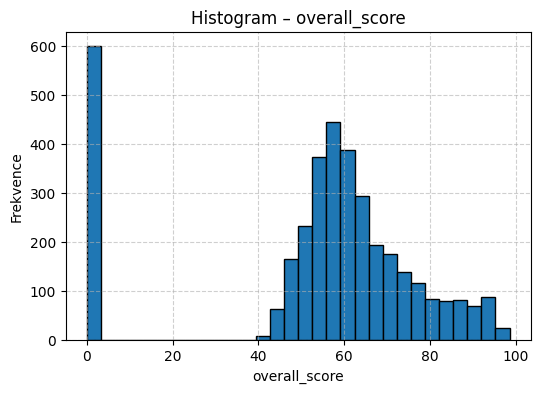

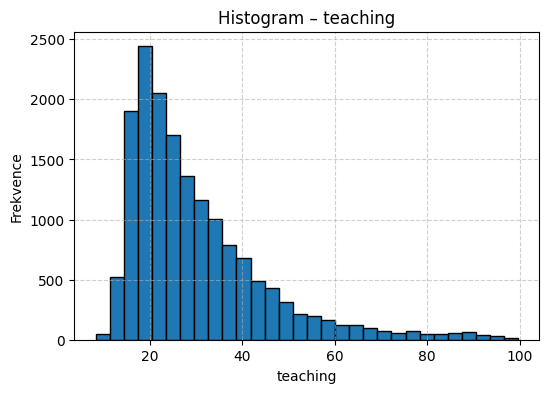

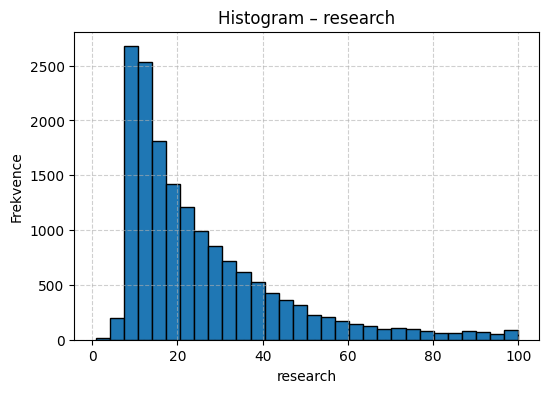

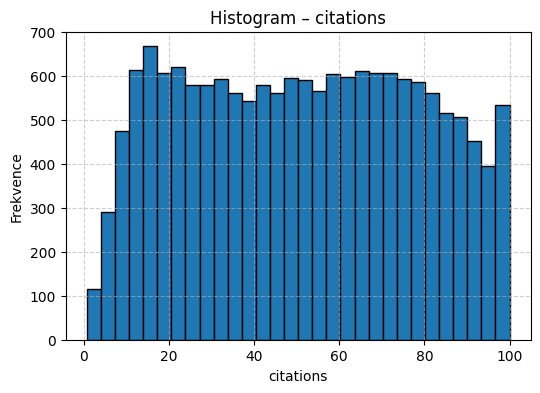

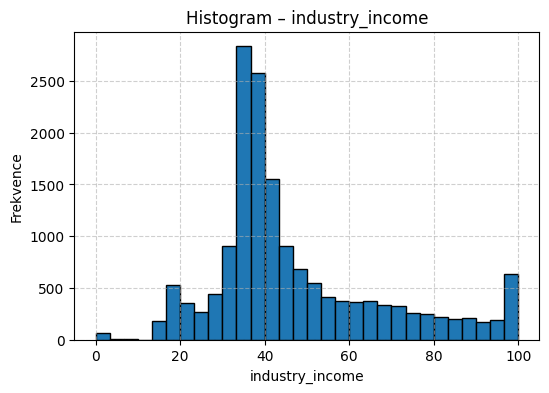

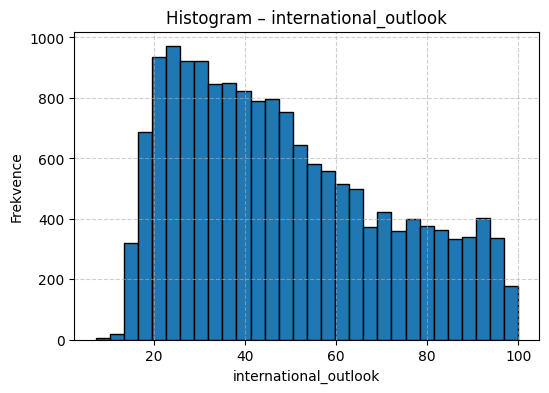

In [9]:
indicators = ["overall_score","teaching","research","citations","industry_income","international_outlook"]

for col in indicators:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        plt.hist(df[col].dropna(), bins=30, edgecolor="black")
        plt.title(f"Histogram – {col}")
        plt.xlabel(col)
        plt.ylabel("Frekvence")
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()


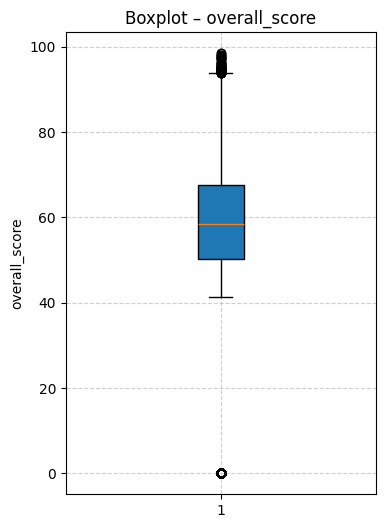

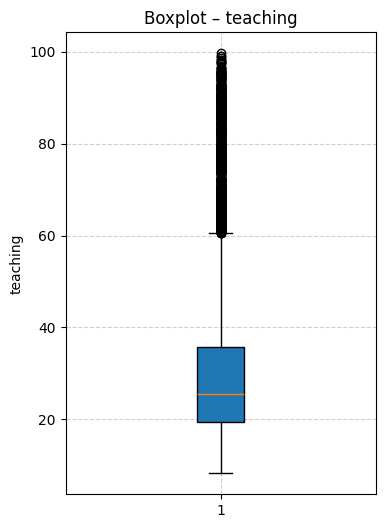

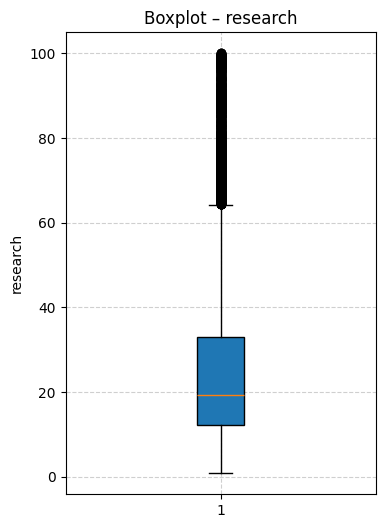

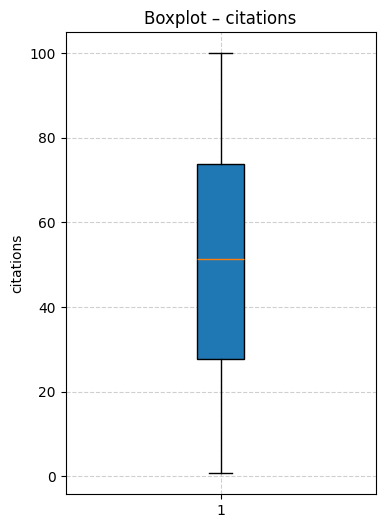

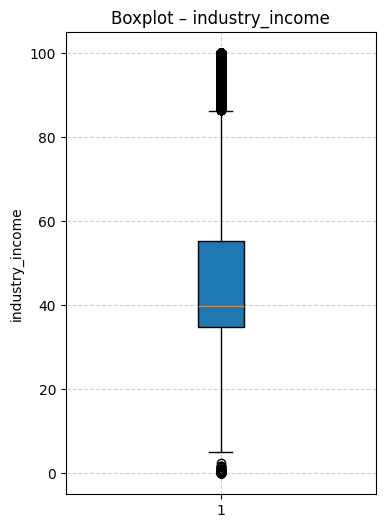

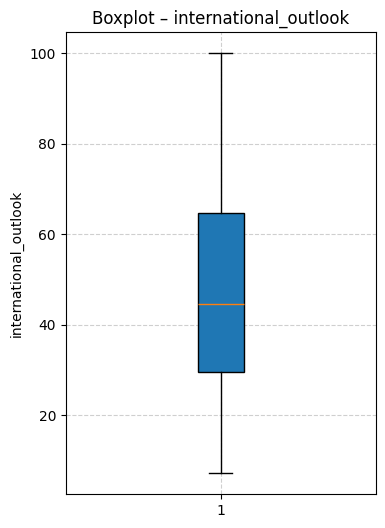

In [10]:
for col in indicators:
    if col in df.columns:
        plt.figure(figsize=(4,6))
        plt.boxplot(df[col].dropna(), vert=True, patch_artist=True)
        plt.title(f"Boxplot – {col}")
        plt.ylabel(col)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()

## 6.2 Vizualizace trendů
Trend vybrané univerzity v čase (např. `overall_score`) a agregované trendy podle zemí (průměrná hodnota).

In [11]:
# Zvol si univerzitu z datasetu (první nenulová jako výchozí)
example_university = df["university"].dropna().unique()[0]
example_university

'Harvard University'

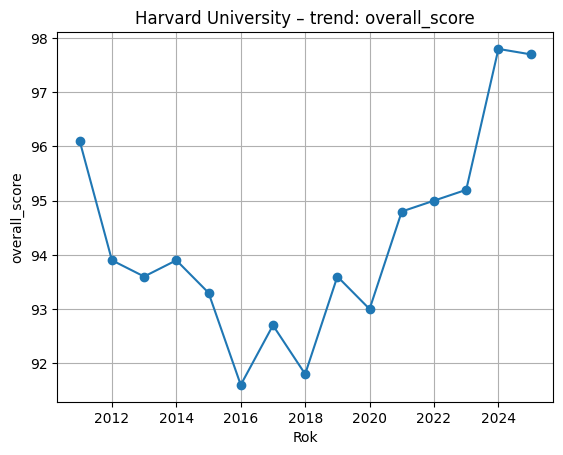

In [12]:
# Trend celkového skóre u vybrané univerzity
plot_university_trend(df, example_university, metric="overall_score")

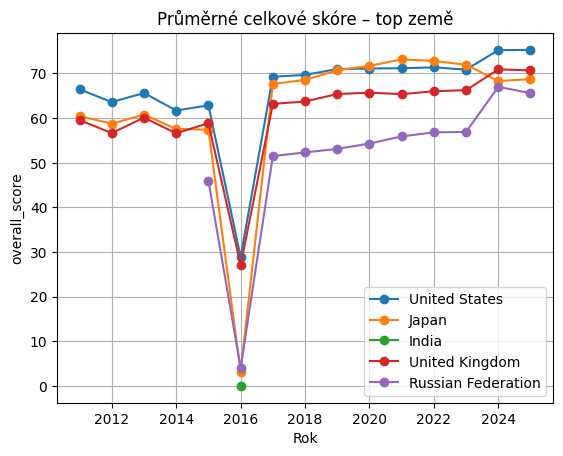

In [13]:
# Agregované trendy: průměrné overall_score v čase pro TOP N zemí podle počtu univerzit
country_trends(df, top_n=5)

## 6.3 Korelace indikátorů
Korelační matice pro klíčové indikátory a její vizualizace (heatmapa).

In [14]:
cols = ["overall_score","teaching","research","citations","industry_income","international_outlook"]
corr = corr_matrix(df, cols)
corr

,overall_score,teaching,research,citations,industry_income,international_outlook
overall_score,1.000000,0.804536,0.852364,0.768291,0.385708,0.453535
teaching,0.804536,1.000000,0.898659,0.529927,0.473974,0.339370
research,0.852364,0.898659,1.000000,0.599498,0.550512,0.473622
citations,0.768291,0.529927,0.599498,1.000000,0.291990,0.551994
industry_income,0.385708,0.473974,0.550512,0.291990,1.000000,0.235789
international_outlook,0.453535,0.339370,0.473622,0.551994,0.235789,1.000000


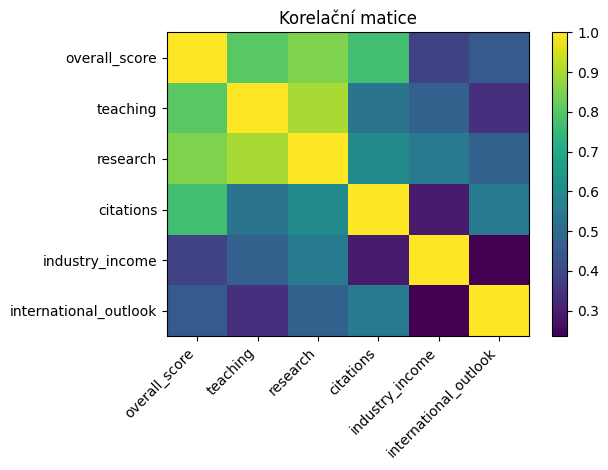

In [15]:
show_corr_heatmap(corr)

## 6.4 Předběžná identifikace klíčových faktorů
Korelace jednotlivých numerických rysů s cíli (`overall_score` a případně `rank`).

In [16]:
res = corr_with_targets(df, targets=("overall_score","rank"))
for target, series in res.items():
    display(series.to_frame(name=f"corr_with_{target}"))

,corr_with_overall_score
overall_score,1.000000
research,0.852364
teaching,0.804536
citations,0.768291
international_outlook,0.453535
industry_income,0.385708
rank,-0.902931


,corr_with_rank
rank,1.000000
industry_income,-0.433652
international_outlook,-0.511456
teaching,-0.618915
research,-0.684680
citations,-0.762132
overall_score,-0.902931


In [17]:
if "overall_score" in res:
    top10 = res["overall_score"].dropna().abs().sort_values(ascending=False).head(10)
    print("Top 10 absolutních korelací s overall_score:")
    display(top10.to_frame("abs_corr"))

Top 10 absolutních korelací s overall_score:


,abs_corr
overall_score,1.000000
rank,0.902931
research,0.852364
teaching,0.804536
citations,0.768291
international_outlook,0.453535
industry_income,0.385708
